# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u = stats.uniform()
data = u.rvs(size=N)
mu = 1
sigma = 1

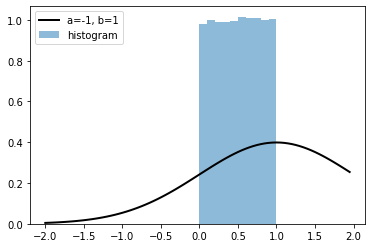

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [4]:
mean = data.mean()
var = data.std()

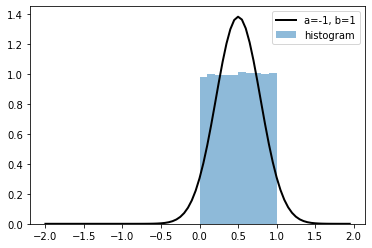

In [5]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, mean, var), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [6]:
mean, var = stats.norm.fit(data)

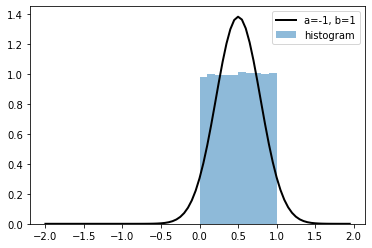

In [7]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, mean, var), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [11]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1 / (sigma * (2 * np.pi)**.5) * np.e**(-(x - mu)**2 / (2 * sigma**2))

In [12]:
def LogGpdf(u):
    mu, sigm = u
    return -np.sum(np.log(Gpdf(data, mu, sigma)))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [13]:
print(LogGpdf((0, 1)))
print(LogGpdf((0, 2)))
print(LogGpdf((1, 1)))
print(LogGpdf((0.5, 0.2)))

108639.41717832322
108639.41717832322
108460.02269877767
96049.71993855042


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [14]:
def f(x):
    x1, x2 = x
    return (x1 + 1)**2 + (x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 16
         Gradient evaluations: 4
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [15]:
res = optimize.fmin_cg(LogGpdf, (1, 1))
print(res)

Optimization terminated successfully.
         Current function value: 96049.559027
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3
[0.50179394 1.        ]


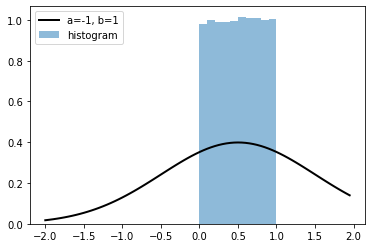

In [16]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, histtype='stepfilled', density=True, alpha=0.5, label='histogram')
ax.plot(t, Gpdf(t, res[0], res[1]), 'k', lw=2, label='a=-1, b=1')

ax.legend(loc='best')
plt.show()

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [17]:
def SN(x, mu, sigma, tau):
        c = np.sqrt(2 / np.pi) / (sigma * (1 + tau))
        return np.where(x > mu, c * np.exp(-((x - mu)**2) / (2 * tau**2 * sigma**2)), c * np.exp(-((x - mu)**2) / (2 * sigma**2)))

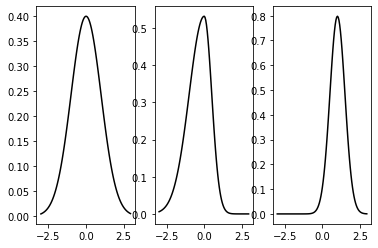

In [18]:
t = np.arange(-3, 3, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 3)
ax[0].plot(t, SN(t, 0, 1, 1), 'k-')
ax[1].plot(t, SN(t, 0, 1, 1/2), 'k-')
ax[2].plot(t, SN(t, 1, 1/2, 1), 'k-')

plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [19]:
def LogGpdf_SN(u):
    m, sigma, tau = u
    return -np.sum(np.log(SN(data, m, np.abs(sigma), np.abs(tau))))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [20]:
res = optimize.fmin_cg(LogGpdf_SN, (1, 1, 1))
print(res)

         Current function value: 17338.506935
         Iterations: 42
         Function evaluations: 725
         Gradient evaluations: 143
[0.91273181 0.52524443 0.09580062]


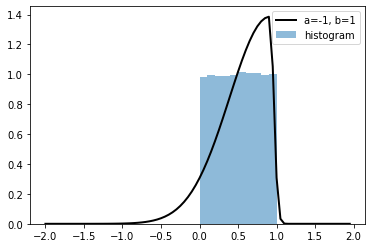

In [21]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, histtype='stepfilled', density=True, alpha=0.5, label='histogram')
ax.plot(t, SN(t, res[0], res[1], res[2]), 'k', lw=2, label='a=-1, b=1')

ax.legend(loc='best')
plt.show()

# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [24]:
from sklearn import datasets
boston = datasets.load_boston()
data = boston.data[:, 7]

In [30]:
mu = np.mean(data)
sigma = np.std(data)
tau = np.std(data)

In [31]:
res = optimize.fmin_cg(LogGpdf_SN, (mu, sigma, tau))
print(res)

Optimization terminated successfully.
         Current function value: 984.728630
         Iterations: 68
         Function evaluations: 755
         Gradient evaluations: 150
[ 1.44344952  0.15733146 20.53572379]


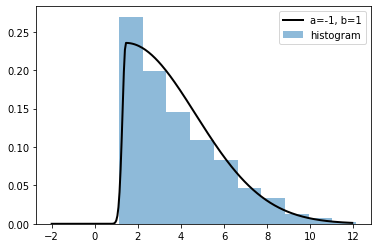

In [32]:
t = np.arange(-2, 12, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, histtype='stepfilled', density=True, alpha=0.5, label='histogram')
ax.plot(t, SN(t, res[0], res[1], res[2]), 'k', lw=2, label='a=-1, b=1')

ax.legend(loc='best')
plt.show()

In [33]:
res = optimize.fmin_cg(LogGpdf, (mu, sigma))
print(res)

Optimization terminated successfully.
         Current function value: 1094.276701
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1
[3.79504269 2.10362836]


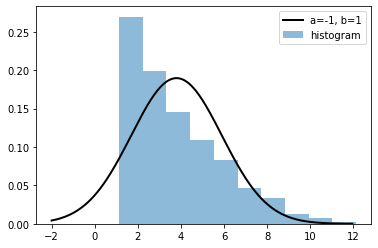

In [34]:
t = np.arange(-2, 12, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, histtype='stepfilled', density=True, alpha=0.5, label='histogram')
ax.plot(t, Gpdf(t, res[0], res[1]), 'k', lw=2, label='a=-1, b=1')

ax.legend(loc='best')
plt.show()